In [2]:
#setup
import numpy as np
import pandas as pd
from DecisionTree import Tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Zadanie 5.
Zbiór danych Car Evaluation (http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) zawiera informacje o samochodach i rekomendacje dotyczącą ich ewentualnego kupna. Zapoznaj się z tym zbiorem danych i stwórz dla niego drzewo decyzyjne.

In [3]:
#load df
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 names=['buy_price', 'maint_price', 'doors', 'people', 'lug_boot', 'safety', 'target'])

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3333)
tree_gini = Tree(train_df, criterion='gini')
tree_entropy = Tree(train_df, criterion='infogain_ratio')

In [5]:
pred_gini, pred_entropy = [], []
for i in range(len(test_df)):
    pred_gini.append(tree_gini.classify(test_df.iloc[i]))
    pred_entropy.append(tree_entropy.classify(test_df.iloc[i]))
    
conf_gini = metrics.confusion_matrix(np.array(pred_gini), test_df['target'])
conf_entropy = metrics.confusion_matrix(np.array(pred_entropy), test_df['target'])

print('Cofussion matrix for gini', conf_gini)
print('Cofussion matrix for entropy', conf_entropy)

Cofussion matrix for gini [[101   3  12   7]
 [  7  12   1   1]
 [ 15   0 395   0]
 [  1   8   0  13]]
Cofussion matrix for entropy [[ 98   0  10   3]
 [  7  15   0   1]
 [ 17   0 398   0]
 [  2   8   0  17]]


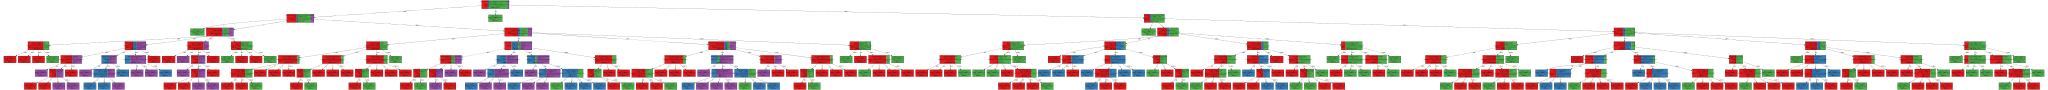

In [6]:
tree_gini.draw()

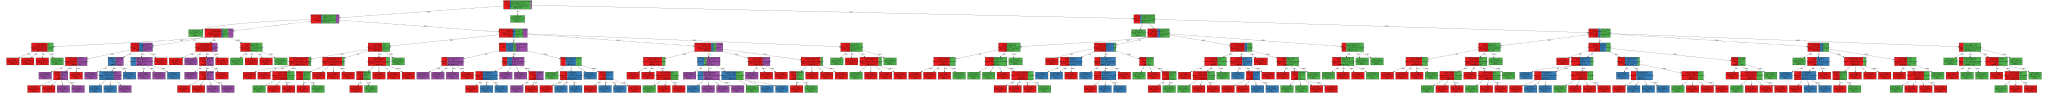

In [7]:
tree_entropy.draw()

### Let's try to prune it

In [8]:
tree_gini.prune_with_confidence_interval()
tree_entropy.prune_with_confidence_interval()

In [9]:
pred_gini, pred_entropy = [], []
for i in range(len(test_df)):
    pred_gini.append(tree_gini.classify(test_df.iloc[i]))
    pred_entropy.append(tree_entropy.classify(test_df.iloc[i]))
    
conf_gini = metrics.confusion_matrix(np.array(pred_gini), test_df['target'])
conf_entropy = metrics.confusion_matrix(np.array(pred_entropy), test_df['target'])

print('Confussion matrix for prunned gini', conf_gini)
print('Confussion matrix for prunned entropy', conf_entropy)

Confussion matrix for prunned gini [[  0   0   0   0]
 [  0   0   0   0]
 [124  23 408  21]
 [  0   0   0   0]]
Confussion matrix for prunned entropy [[  0   0   0   0]
 [  0   0   0   0]
 [124  23 408  21]
 [  0   0   0   0]]


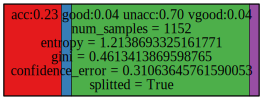

In [10]:
tree_gini.draw()

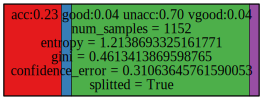

In [11]:
tree_entropy.draw()